# MuMoT Test Suite

In [1]:
import MuMoT.MuMoT as mmt # if working directly from git clone
#import MuMoT as mmt # if working with pip installed module

Created `%%model` as an alias for `%%latex`.


## Substitution and display tests based on 2-d stop-signal model

**TODO** LaTeX rates *and* reactants to be used to test rendering functionality in plots and widgets

In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [6]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

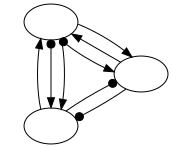

In [8]:
model3.visualise()

### Check substitutions do not change original model

In [9]:
model1.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
model1.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

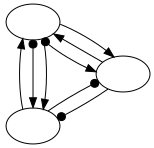

In [11]:
model1.visualise()

## Set system size

In [12]:
model4 = model3.substitute('U = N - \A - \B')

In [13]:
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2d bifurcation plot tests

In [14]:
#modelBifCont1 = model4.bifurcation('s','B', initSV=[['A', 0.1], ['B', 0.9]], 
#                                   fontsize=35, BifParInit =5, ContMaxNumPoints=450)

<IPython.core.display.Javascript object>


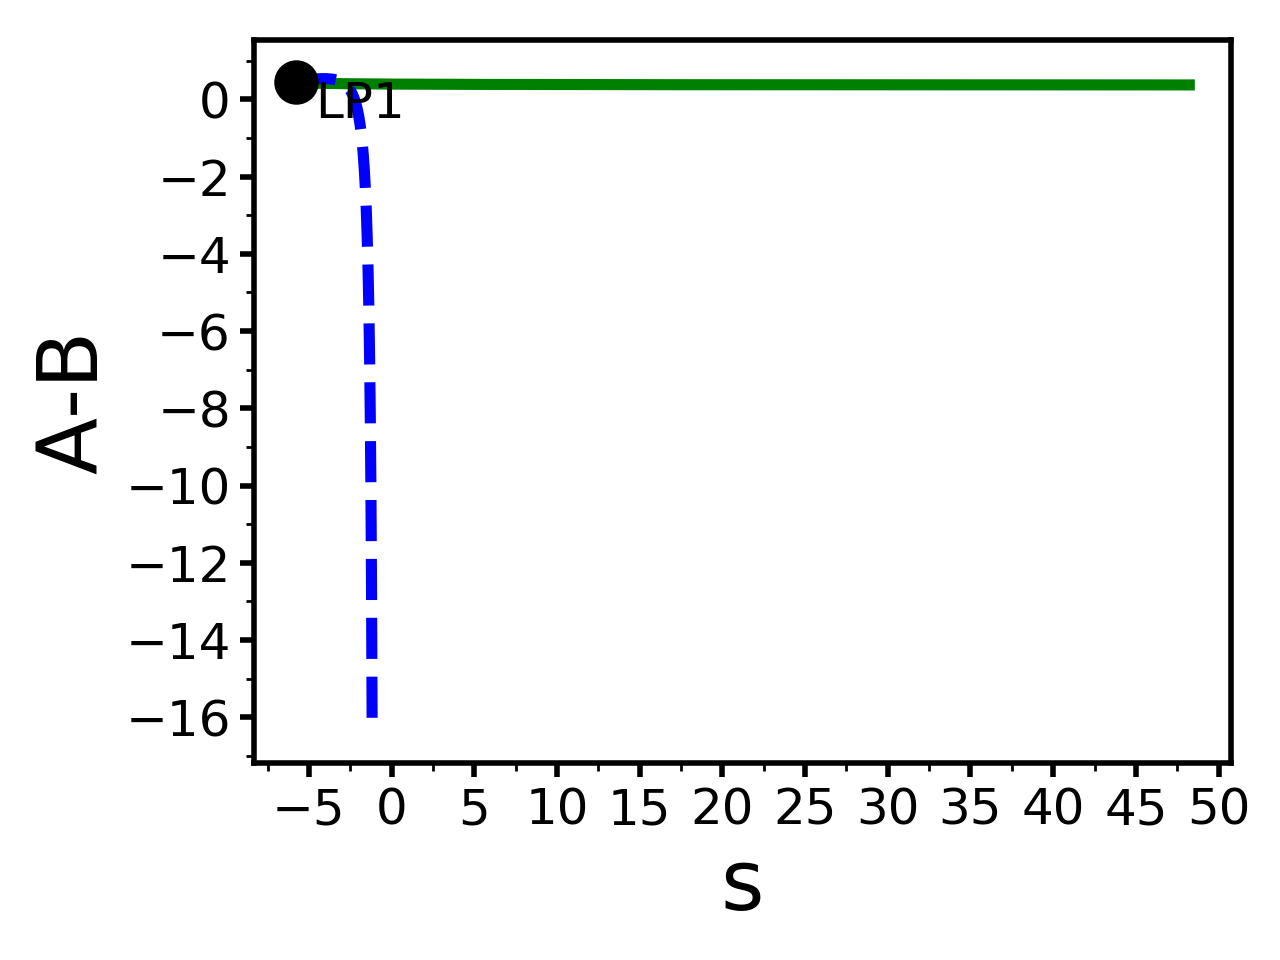

In [15]:
modelBifCont1 = model4.bifurcation('s','A-B',initSV=[['A', 0.5], ['B', 0.5]])

In [16]:
modelBifCont1.showLogs()

Initial conditions chosen for state variables:  {'B': 0.5, 'A': 0.5}
Starting bifurcation analysis with parameters (Delta=0.5), (mu=0.5), at 2017-11-08 17:10:05.720789
LP Point found 
Special Points on curve:  [[-5.7911410309253686], array([ 0.45823844]), ['LP1']]


In [17]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [18]:
model6 = model5.substitute('U = N - \A - \B')

In [19]:
model6.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot')

In [21]:
#modelBifCont2.showLogs()

## 2d stream plot tests

<IPython.core.display.Javascript object>


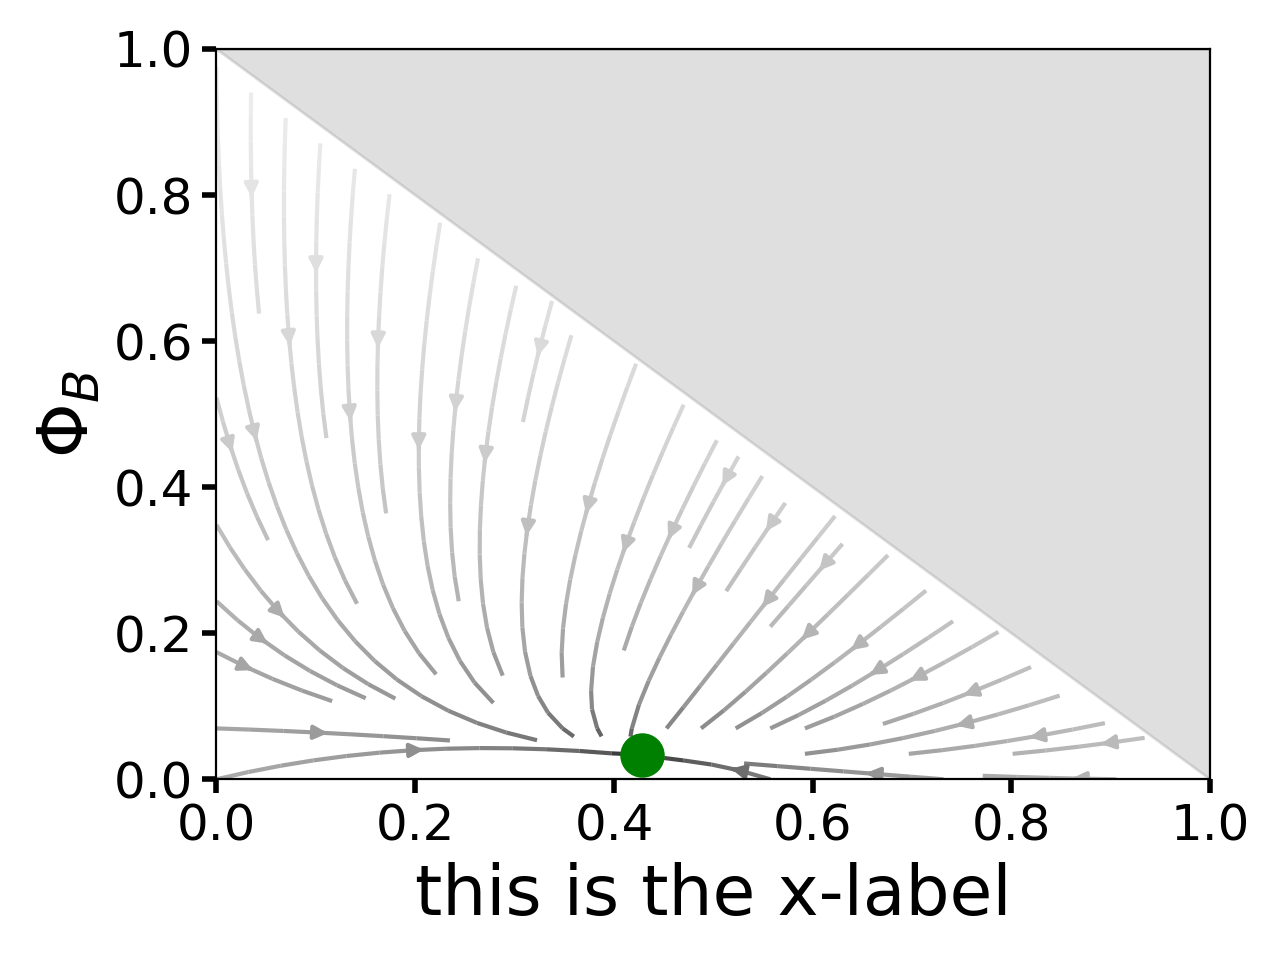

In [22]:
modelStreamCont1 = model4.stream('A', 'B',fontsize=25, xlab=r'this is the x-label', showFixedPoints=True)

In [23]:
modelStreamCont1.showLogs()

Starting 2d stream plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:10:42.166267
Fixed point1: {A: -5.07742251803145, B: 2.11108383569674} with eigenvalues: [1.19823530988406 - 2.06860977059716*I, 1.19823530988406 + 2.06860977059716*I]
Fixed point2: {A: -2.73163936879237, B: 0.451935509702281} with eigenvalues: [1.80514852121452, -1.78318041674401]
Fixed point3: {A: -0.674235490110280, B: -14.0960667674616} with eigenvalues: [17.3674421933131, 3.48437116915956]
Fixed point4: {A: 0.427741821378538, B: 0.0330474220626065} with eigenvalues: [-4.48057864092402, -1.87300677912059]


<IPython.core.display.Javascript object>


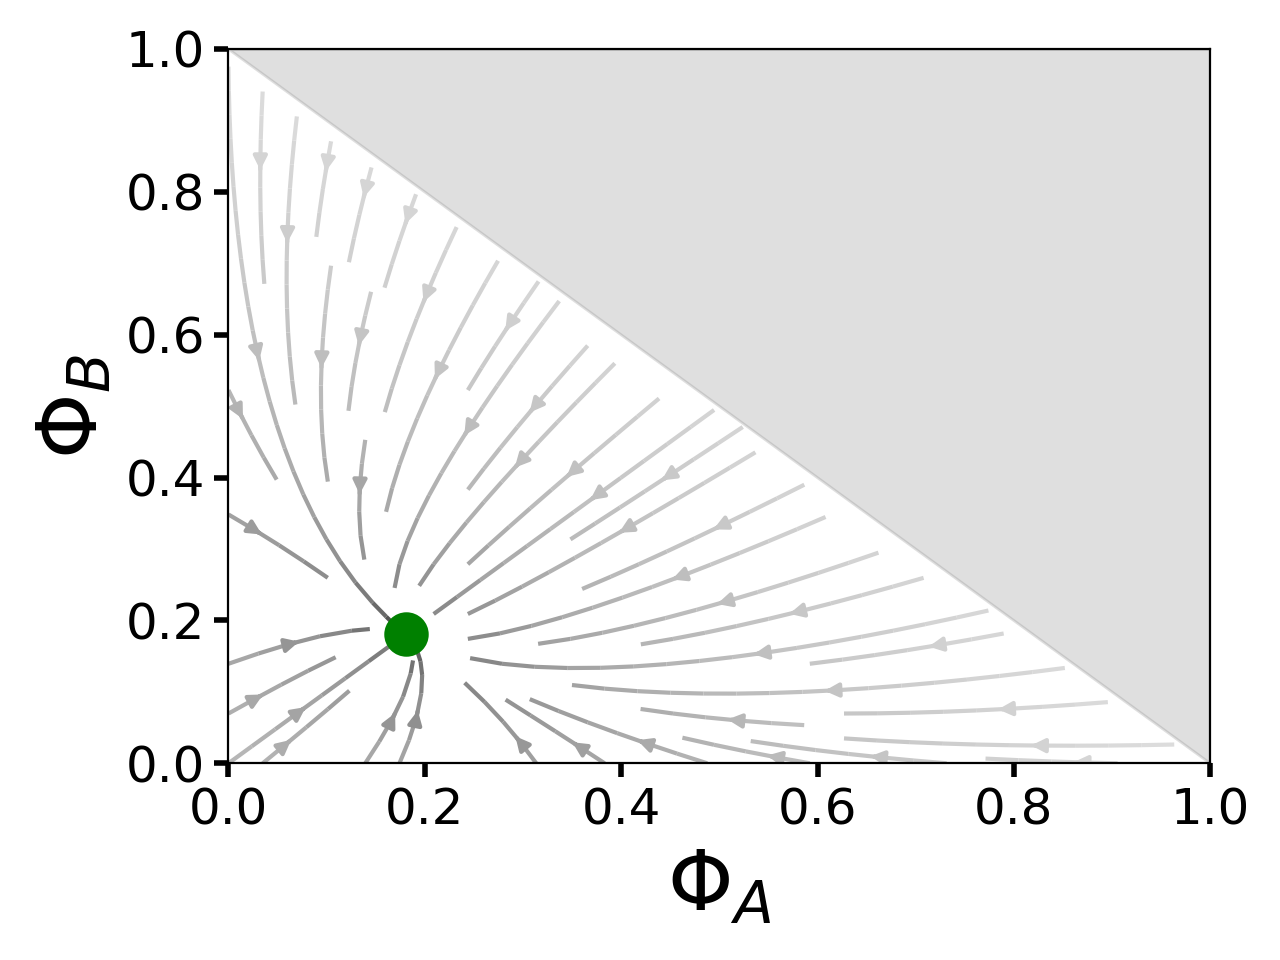

In [24]:
modelStreamCont2 = model6.stream('A', 'B')

In [25]:
modelStreamCont2.showLogs()

Starting 2d stream plot with parameters (s=0.5), (v=0.5), at 2017-11-08 17:10:43.998409
Fixed point1: {A: -1.84712708838304, B: -1.84712708838304} with eigenvalues: [3.04138126514911, 0.347127088383030]
Fixed point2: {A: 0.180460421716370, B: 0.180460421716370} with eigenvalues: [-1.68046042171637, -3.04138126514911]


## 2d vector plot tests

<IPython.core.display.Javascript object>


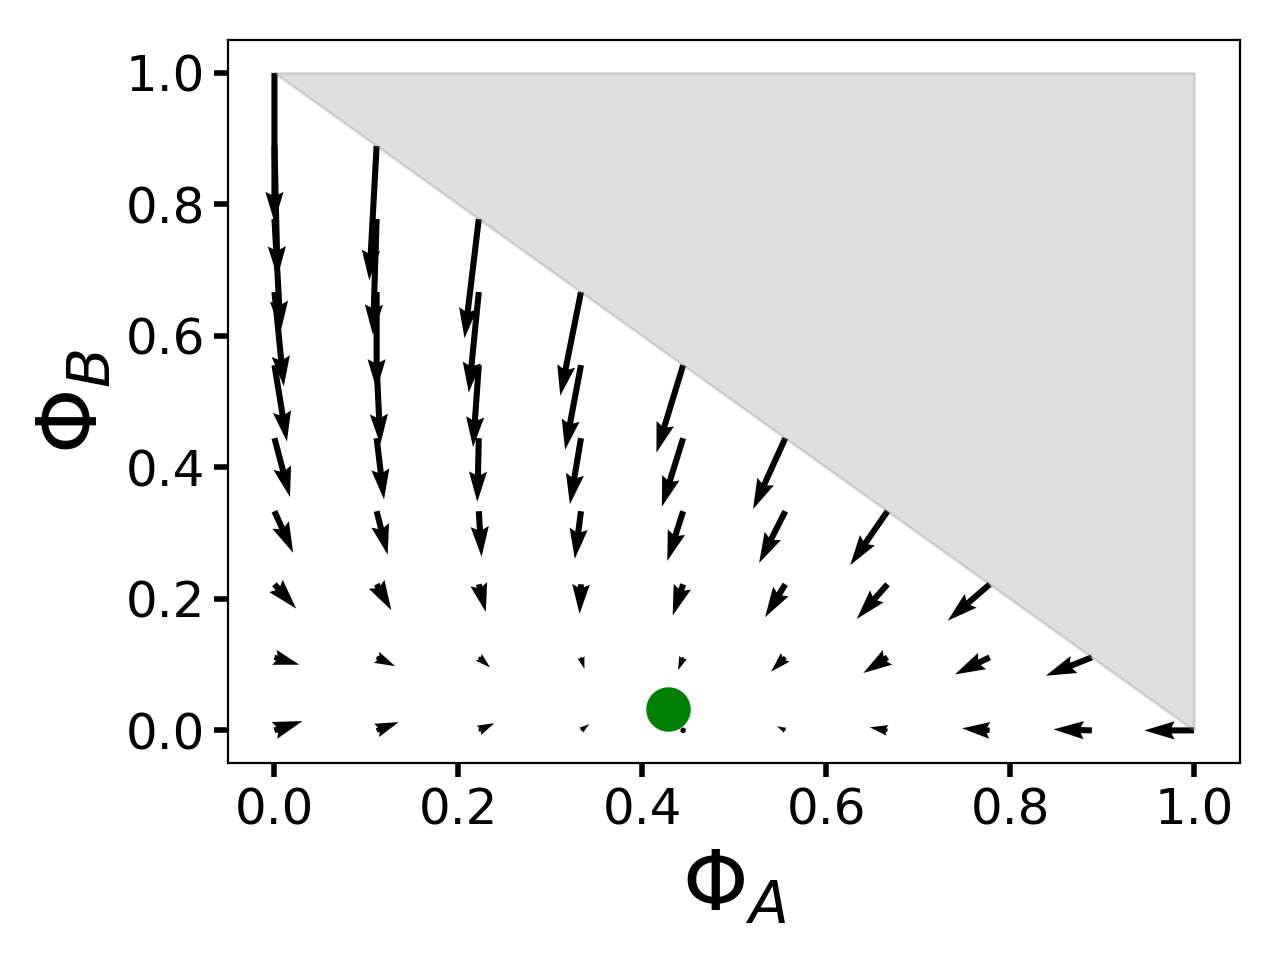

In [26]:
modelVectorCont1 = model4.vector('A', 'B', showFixedPoints=True)

In [27]:
modelVectorCont1.showLogs()

Starting 2d vector plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:11:13.572852
Fixed point1: {A: -5.07742251803145, B: 2.11108383569674} with eigenvalues: [1.19823530988406 - 2.06860977059716*I, 1.19823530988406 + 2.06860977059716*I]
Fixed point2: {A: -2.73163936879237, B: 0.451935509702281} with eigenvalues: [1.80514852121452, -1.78318041674401]
Fixed point3: {A: -0.674235490110280, B: -14.0960667674616} with eigenvalues: [17.3674421933131, 3.48437116915956]
Fixed point4: {A: 0.427741821378538, B: 0.0330474220626065} with eigenvalues: [-4.48057864092402, -1.87300677912059]


## 3d vector plot test

In [28]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

<IPython.core.display.Latex object>

In [29]:
model7 = mmt.parseModel(In[28])

In [30]:
model8 = model7.substitute('U = N - A - B - C')

<IPython.core.display.Javascript object>


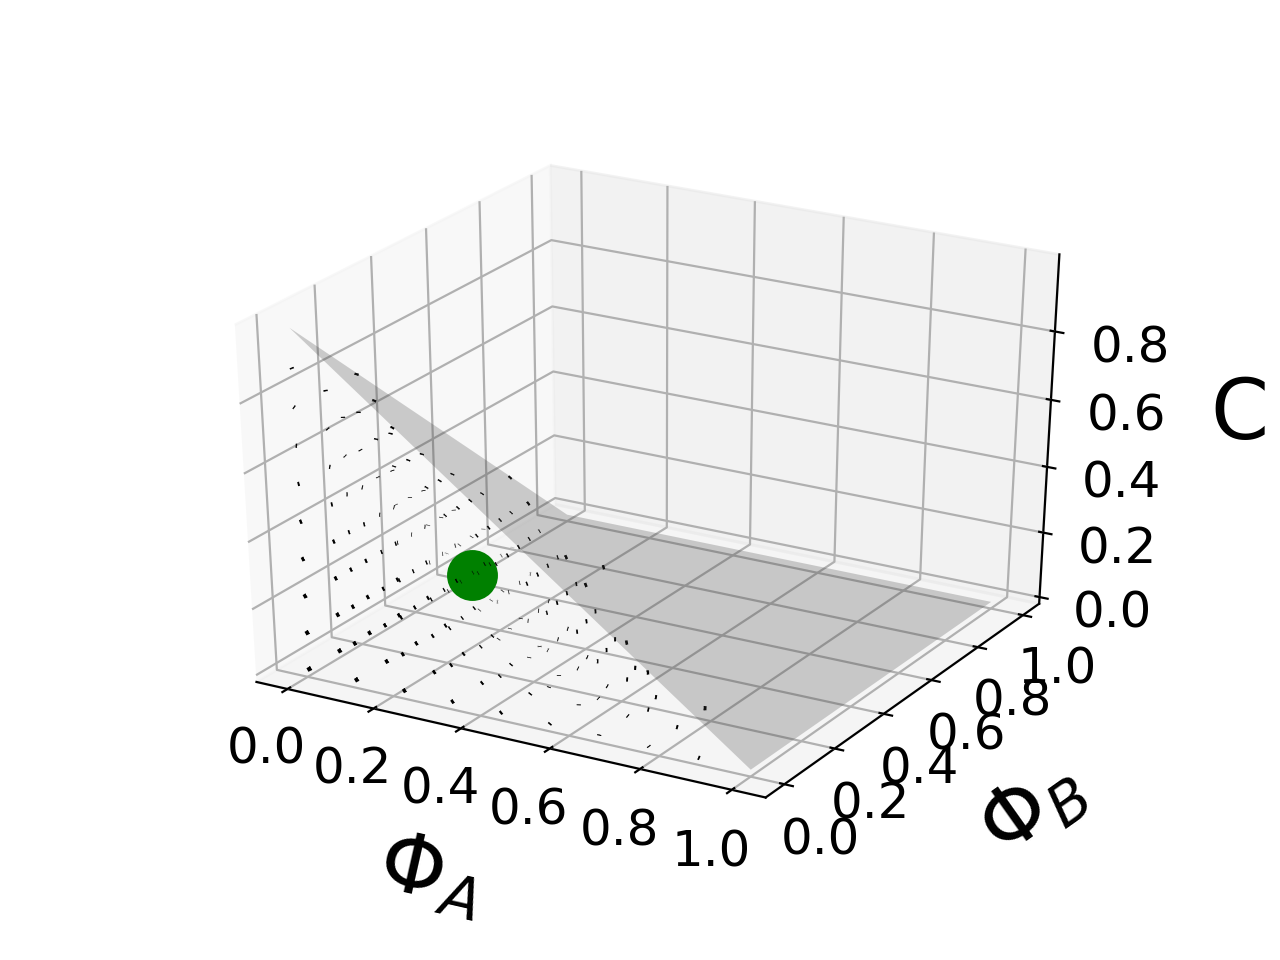

In [31]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [32]:
modelVectorCont2.showLogs()

Starting 3d vector plot with parameters (a_{1}=0.5), (a_{2}=0.5), (a_{3}=0.5), (g_{1}=0.5), (g_{2}=0.5), (g_{3}=0.5), (r_{1}=0.5), (r_{2}=0.5), (r_{3}=0.5), (s=0.5), at 2017-11-08 17:11:17.033056
Fixed point1: {A: -0.838516480713450, C: -0.838516480713450, B: -0.838516480713450} with eigenvalues: [1.67703296142690, 1.67703296142690, 2.69258240356725]
Fixed point2: {A: 0.238516480713450, C: 0.238516480713450, B: 0.238516480713450} with eigenvalues: [-0.477032961426900, -0.477032961426900, -2.69258240356725]


## Non-constant system size tests with Brusselator

In [33]:
%%model
$
(\alpha) -> X : \gamma
X + X + Y -> X + X + X : \chi
(\beta) + X -> Y + \emptyset : \delta
X -> \emptyset : \xi
$

<IPython.core.display.Latex object>

In [34]:
model9 = mmt.parseModel(In[33])

In [35]:
model9.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
model9.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
model9.showReactants()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Model contains rules with three or more reactants; only displaying unary and binary rules


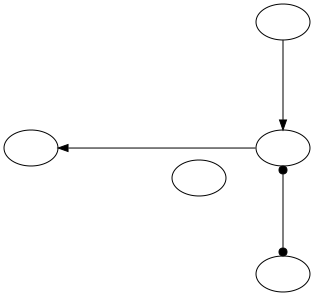

In [38]:
model9.visualise()

<IPython.core.display.Javascript object>


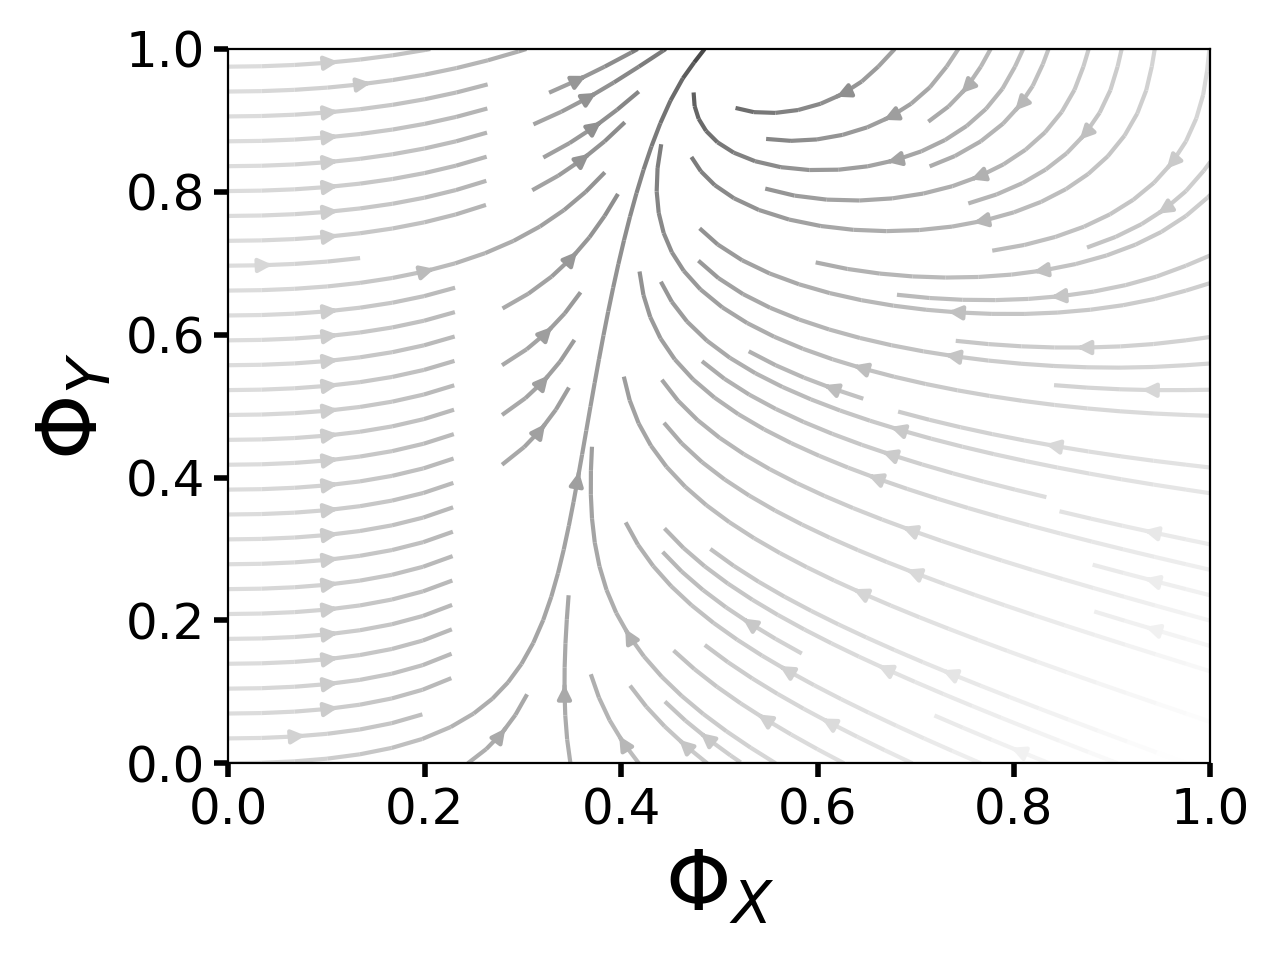

In [39]:
modelStreamCont3 = model9.stream('X','Y', showFixedPoints = False)

In [40]:
modelStreamCont3.showLogs(tail = True)

Showing last 1 of 1 log entries:
Starting 2d stream plot with parameters (alpha=0.5), (beta=0.5), (chi=0.5), (delta=0.5), (gamma=0.5), (xi=0.5), at 2017-11-08 17:11:19.855526


## SSA and multiagent tests

## Master Equation and noise approximation tests

In [41]:
model9.showODEs_vKE()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
model9.showMasterEquation()

<IPython.core.display.Math object>

In [43]:
model9.showFokkerPlanckEquation()

<IPython.core.display.Math object>

In [44]:
model9.showNoiseEOM()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
model9.showNoiseStationarySol()

Stationary solutions of first and second order moments of noise:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## View / controller separation tests

In [46]:
#soloView1 = mmt.MuMoTbifurcationView(model4, None, 's', 'A', plottingMethod='pyds',
#                                     params = [('\mu', 1), ('v', 2), ('\Delta', 0)])

<IPython.core.display.Javascript object>


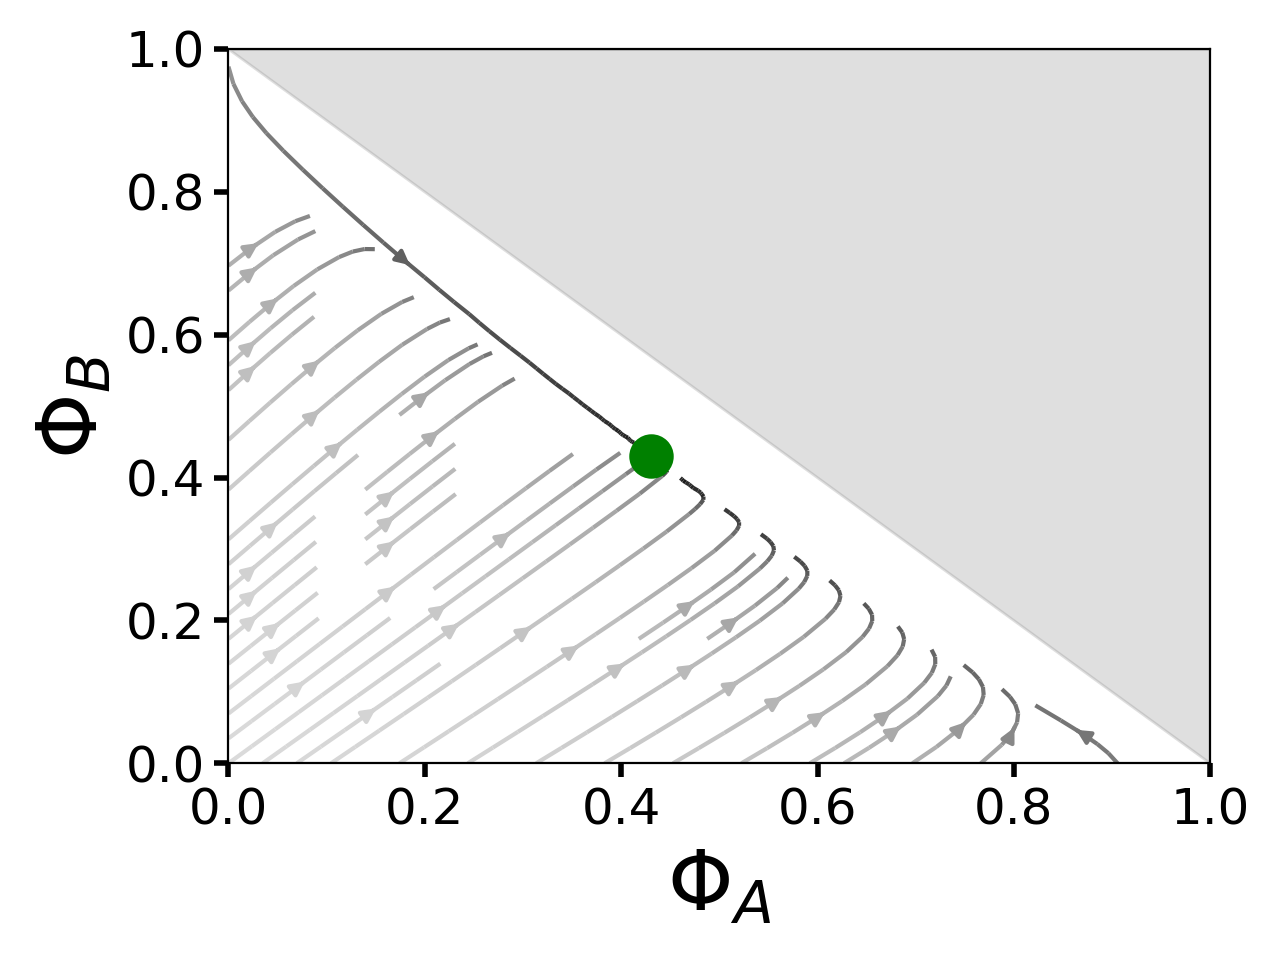

In [47]:
soloView2 = mmt.MuMoTstreamView(model6, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [48]:
model10 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = r')

<IPython.core.display.Javascript object>


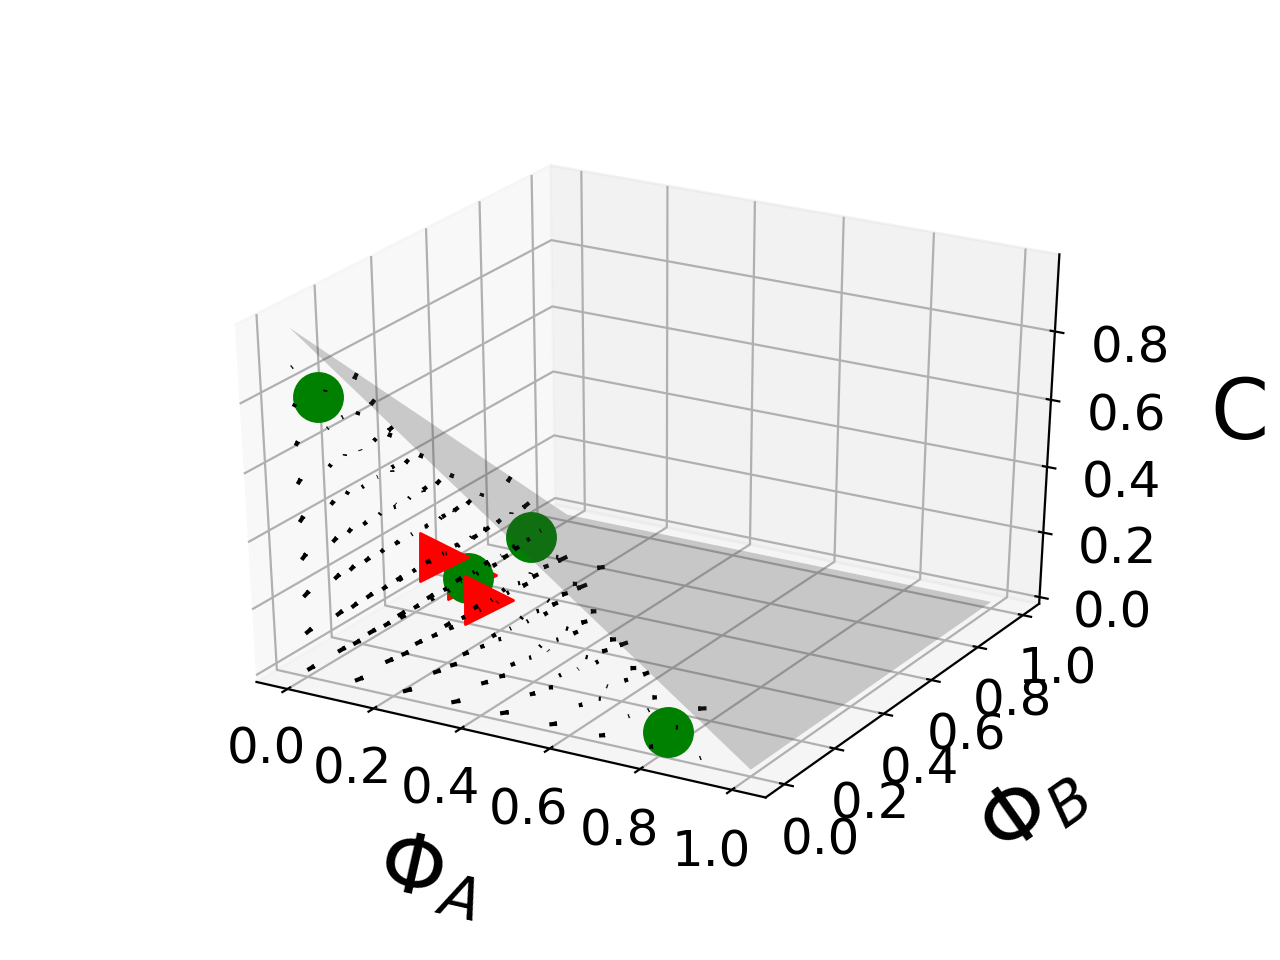

In [49]:
soloView3 = mmt.MuMoTvectorView(model10, None, 'A', 'B', 'C', params = [('s', 5), ('a', 1/2), ('r', 5), ('g', 1)])

In [50]:
soloView3.showLogs()

Starting 3d vector plot with parameters (s=5), (a=0.5), (r=5), (g=1), at 2017-11-08 17:11:47.500368
Fixed point1: {A: -0.172237484161567, C: -0.172237484161567, B: -0.172237484161567} with eigenvalues: [10.1118742080783, 7.94474968323133, 7.94474968323133]
Fixed point2: {A: 0.0333333333333333, C: 0.800000000000000, B: 0.0333333333333333} with eigenvalues: [-0.889201008602891, -10.7774656580638, -3.83333333333333]
Fixed point3: {A: 0.0333333333333333, C: 0.0333333333333333, B: 0.800000000000000} with eigenvalues: [-0.889201008602891, -10.7774656580638, -3.83333333333333]
Fixed point4: {A: 0.200000000000000, C: 0.300000000000000, B: 0.200000000000000} with eigenvalues: [0.123475382979799, -10.1234753829798, -0.500000000000000]
Fixed point5: {A: 0.200000000000000, C: 0.200000000000000, B: 0.300000000000000} with eigenvalues: [0.123475382979799, -10.1234753829798, -0.500000000000000]
Fixed point6: {A: 0.232237484161567, C: 0.232237484161567, B: 0.232237484161567} with eigenvalues: [-0.1447

## Multi controller tests

<IPython.core.display.Javascript object>


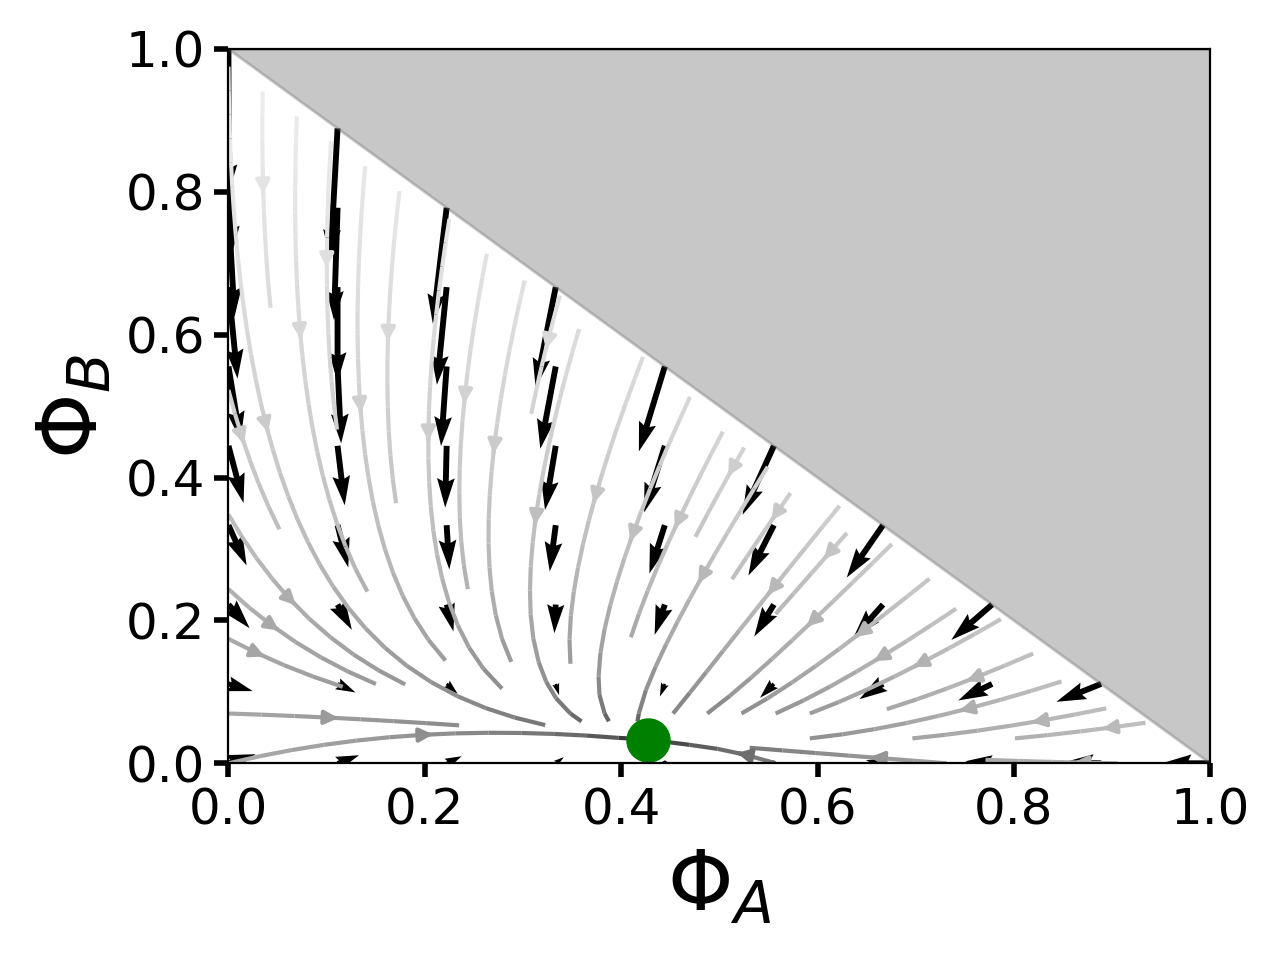

In [51]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True, showFixedPoints=False), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True)

In [52]:
multiController1.showLogs()

Starting 2d stream plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:11:47.709908
Starting 2d vector plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:12:16.232339
Fixed point1: {A: -5.07742251803145, B: 2.11108383569674} with eigenvalues: [1.19823530988406 - 2.06860977059716*I, 1.19823530988406 + 2.06860977059716*I]
Fixed point2: {A: -2.73163936879237, B: 0.451935509702281} with eigenvalues: [1.80514852121452, -1.78318041674401]
Fixed point3: {A: -0.674235490110280, B: -14.0960667674616} with eigenvalues: [17.3674421933131, 3.48437116915956]
Fixed point4: {A: 0.427741821378538, B: 0.0330474220626065} with eigenvalues: [-4.48057864092402, -1.87300677912059]


<IPython.core.display.Javascript object>


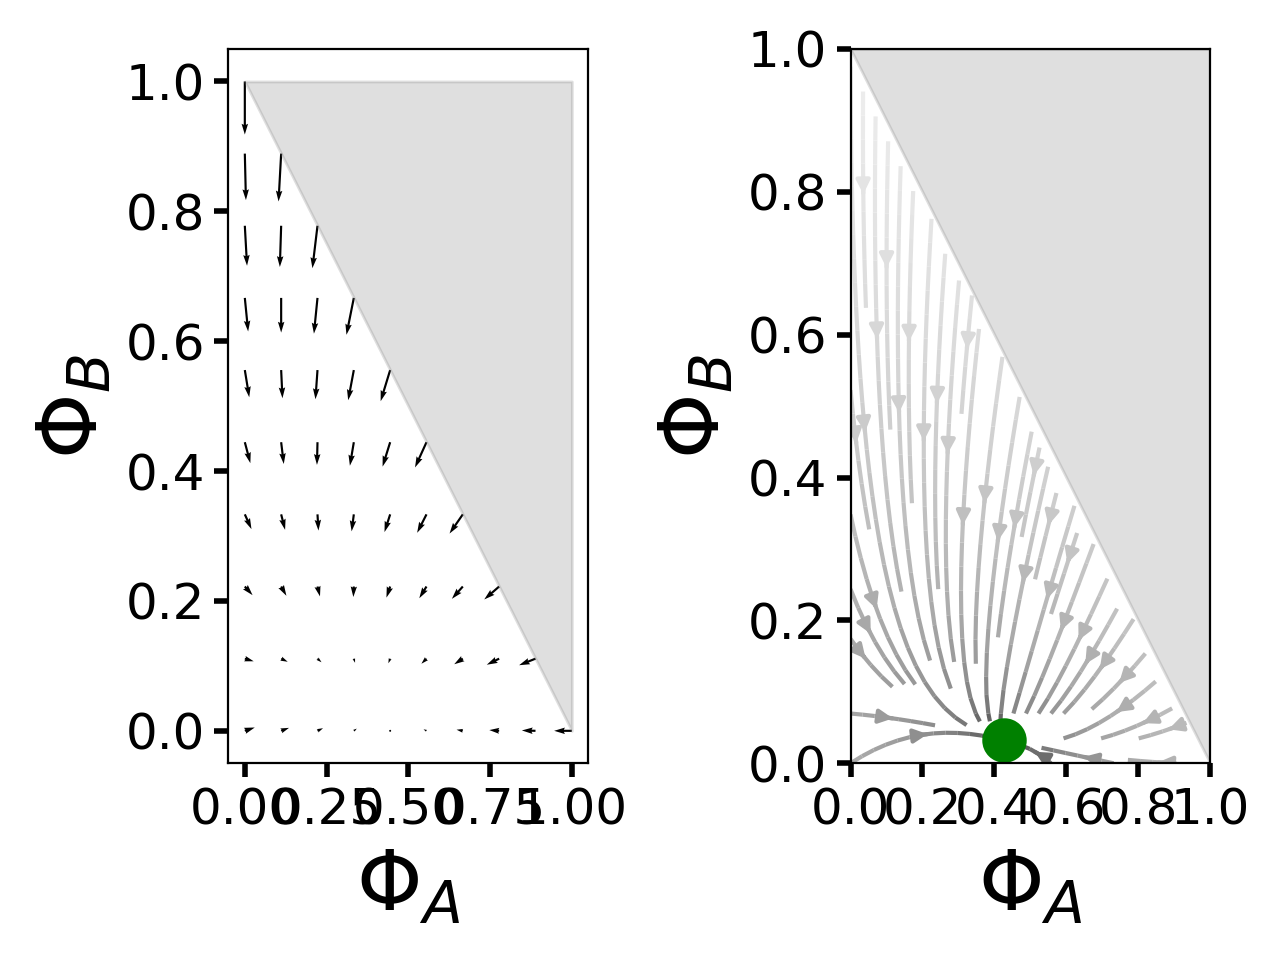

In [53]:
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True, showFixedPoints=False), model4.stream('A', 'B', silent = True)])

In [54]:
multiController2.showLogs()

Starting 2d vector plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:12:16.511473
Starting 2d stream plot with parameters (Delta=0.5), (mu=0.5), (s=0.5), at 2017-11-08 17:12:43.355331
Fixed point1: {A: -5.07742251803145, B: 2.11108383569674} with eigenvalues: [1.19823530988406 - 2.06860977059716*I, 1.19823530988406 + 2.06860977059716*I]
Fixed point2: {A: -2.73163936879237, B: 0.451935509702281} with eigenvalues: [1.80514852121452, -1.78318041674401]
Fixed point3: {A: -0.674235490110280, B: -14.0960667674616} with eigenvalues: [17.3674421933131, 3.48437116915956]
Fixed point4: {A: 0.427741821378538, B: 0.0330474220626065} with eigenvalues: [-4.48057864092402, -1.87300677912059]


In [55]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

### Nested multicontrollers

In [56]:
#multiController4 = mmt.MuMoTmultiController([model10.vector('A', 'B', 'C', silent = True, showFixedPoints=True), 
#                                             multiController3])

In [57]:
#multiController4.showLogs()

## Bookmark / partial controller tests

<IPython.core.display.Javascript object>


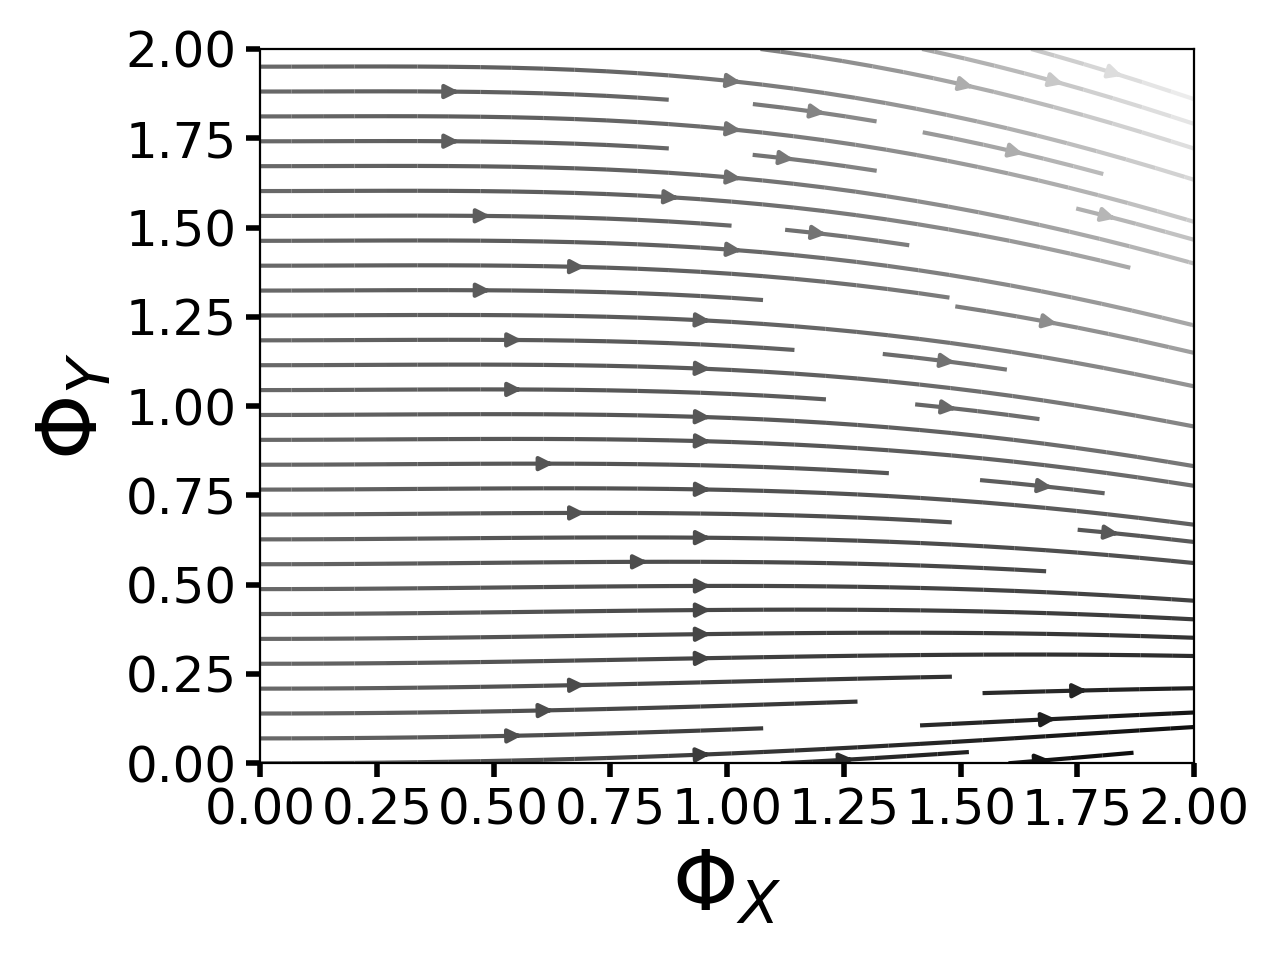

In [58]:
partial1 = model9.stream('X','Y', params = [('\\alpha', 10), ('plotLimits', 2)], showFixedPoints = False)

In [59]:
modelBifCont1._view._build_bookmark().replace('\\\\','\\')

"bookmark = <modelName>.bifurcation('s', 'A', 'B', params = [('\\mu', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], initSV = [['A', 0.5], ['B', 0.5]], bookmark = False)"

<IPython.core.display.Javascript object>


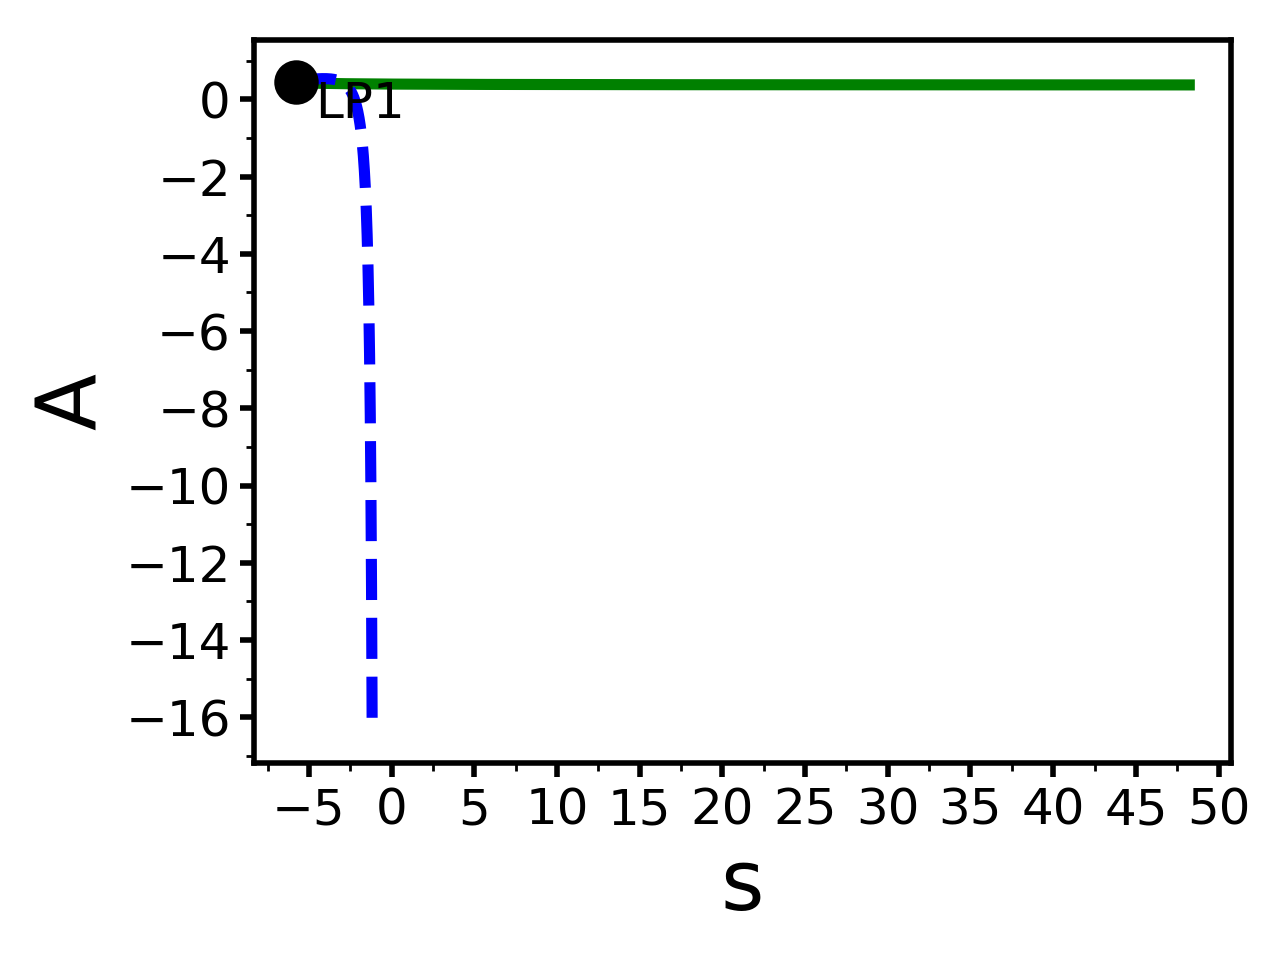

In [60]:
bookmark1 = model4.bifurcation('s', 'A', 'B', params = [('\\mu', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], initSV = [['A', 0.5], ['B', 0.5]], bookmark = False)

In [61]:
modelStreamCont3._view._build_bookmark().replace('\\\\','\\')

"bookmark = <modelName>.stream('X', 'Y', params = [('\\gamma', 0.5), ('\\chi', 0.5), ('\\alpha', 0.5), ('\\delta', 0.5), ('\\beta', 0.5), ('\\xi', 0.5), ('plotLimits', 1.0), ('systemSize', 1)], showFixedPoints = False, bookmark = False)"

<IPython.core.display.Javascript object>


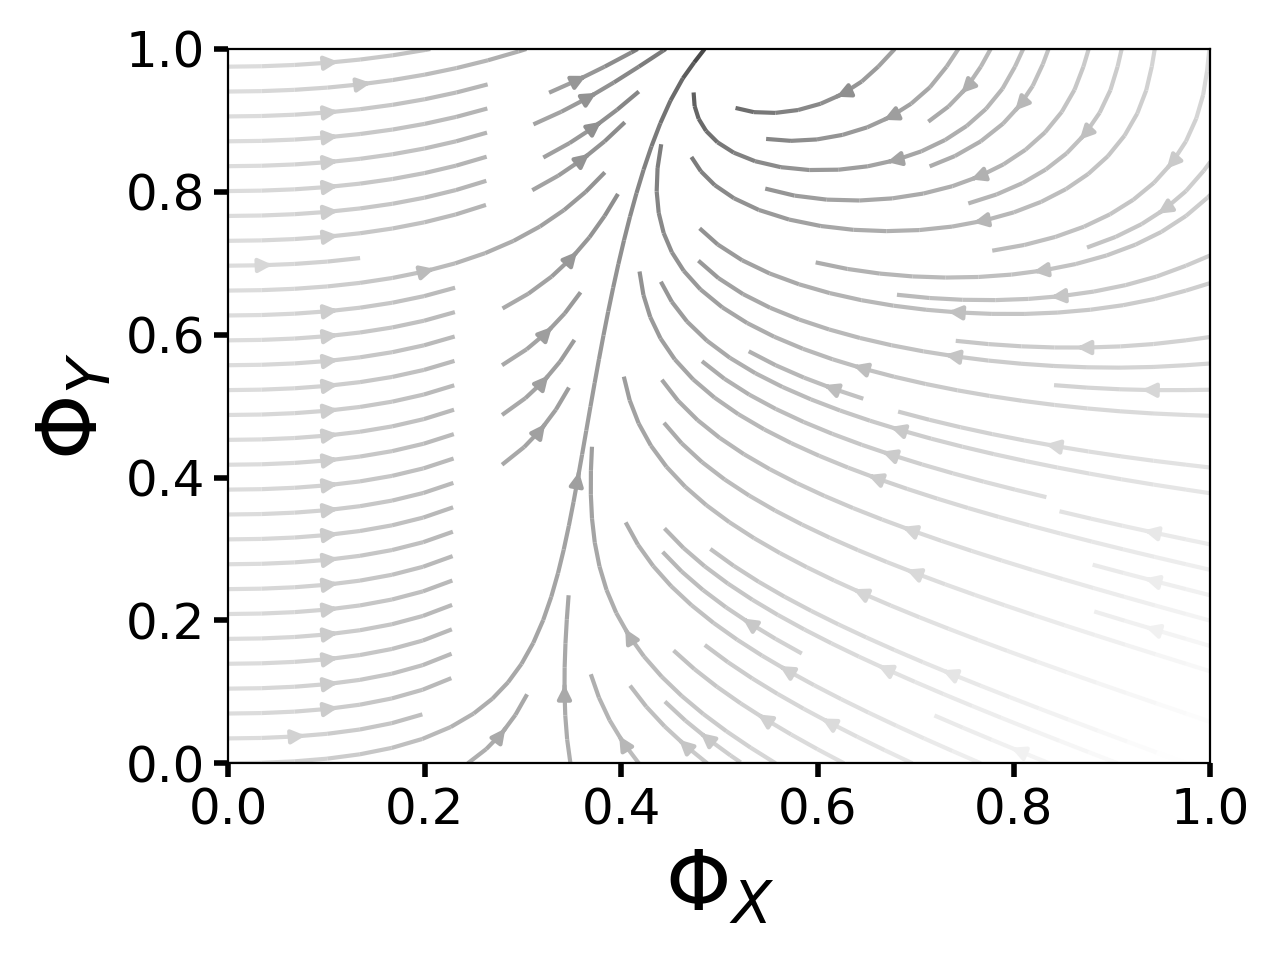

In [62]:
bookmark2 = model9.stream('X', 'Y', params = [('\\alpha', 0.5), ('\\xi', 0.5), ('\\delta', 0.5), ('\\chi', 0.5), ('\\beta', 0.5), ('\\gamma', 0.5), ('plotLimits', 1.0), ('systemSize', 1)], showFixedPoints = False, bookmark = False)

In [63]:
modelVectorCont1._view._build_bookmark().replace('\\\\','\\')

"bookmark = <modelName>.vector('A', 'B', params = [('s', 0.5), ('\\mu', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], showFixedPoints = True, bookmark = False)"

<IPython.core.display.Javascript object>


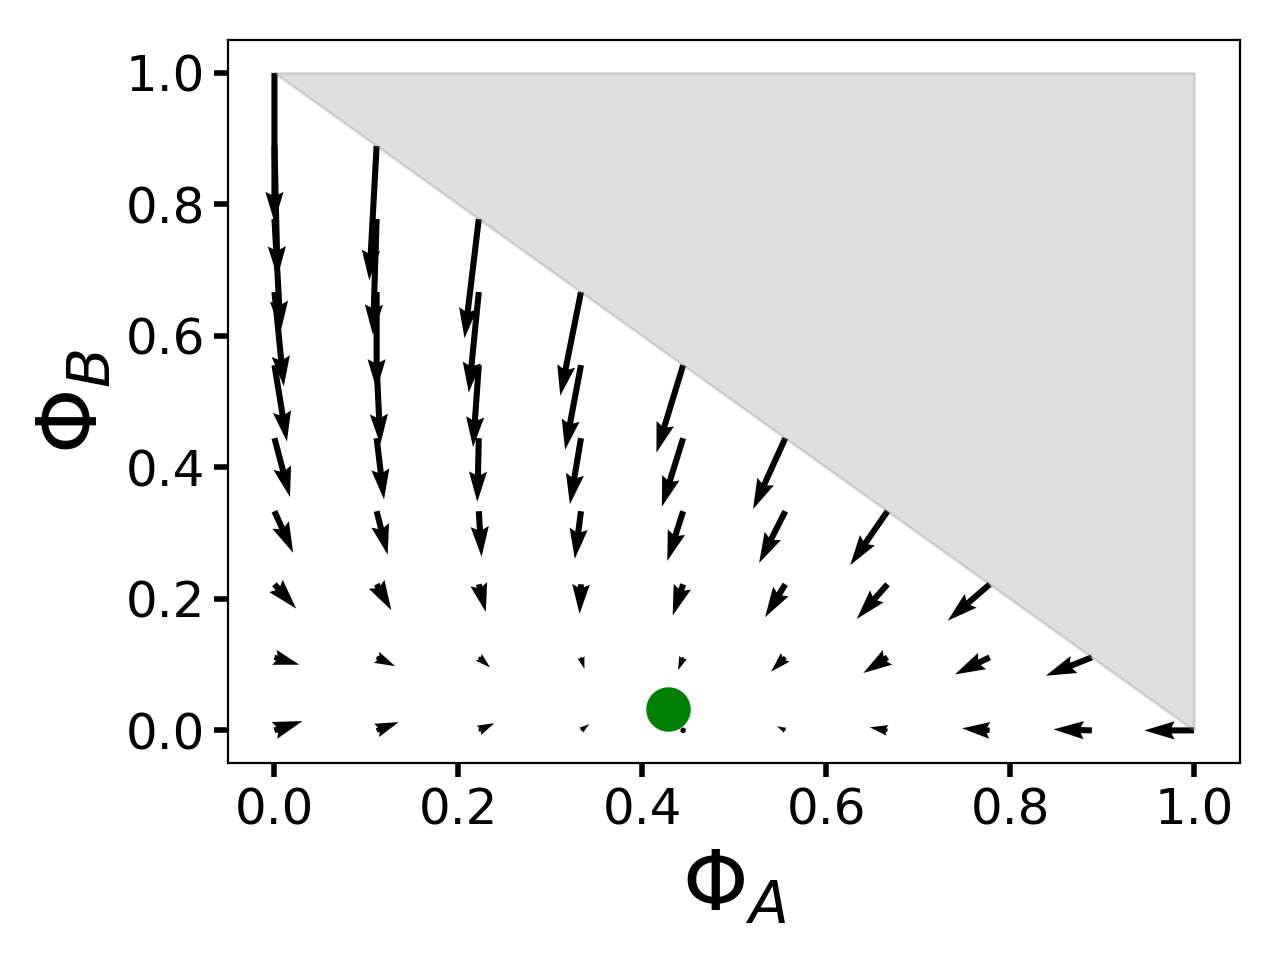

In [64]:
bookmark3 = model4.vector('A', 'B', params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], showFixedPoints = True, bookmark = False)

In [65]:
modelVectorCont2._view._build_bookmark().replace('\\\\','\\')

"bookmark = <modelName>.vector('A', 'B', 'C', params = [('a_{2}', 0.5), ('g_{2}', 0.5), ('r_{3}', 0.5), ('r_{1}', 0.5), ('a_{1}', 0.5), ('s', 0.5), ('g_{1}', 0.5), ('g_{3}', 0.5), ('r_{2}', 0.5), ('a_{3}', 0.5), ('plotLimits', 1), ('systemSize', 1)], bookmark = False)"

<IPython.core.display.Javascript object>


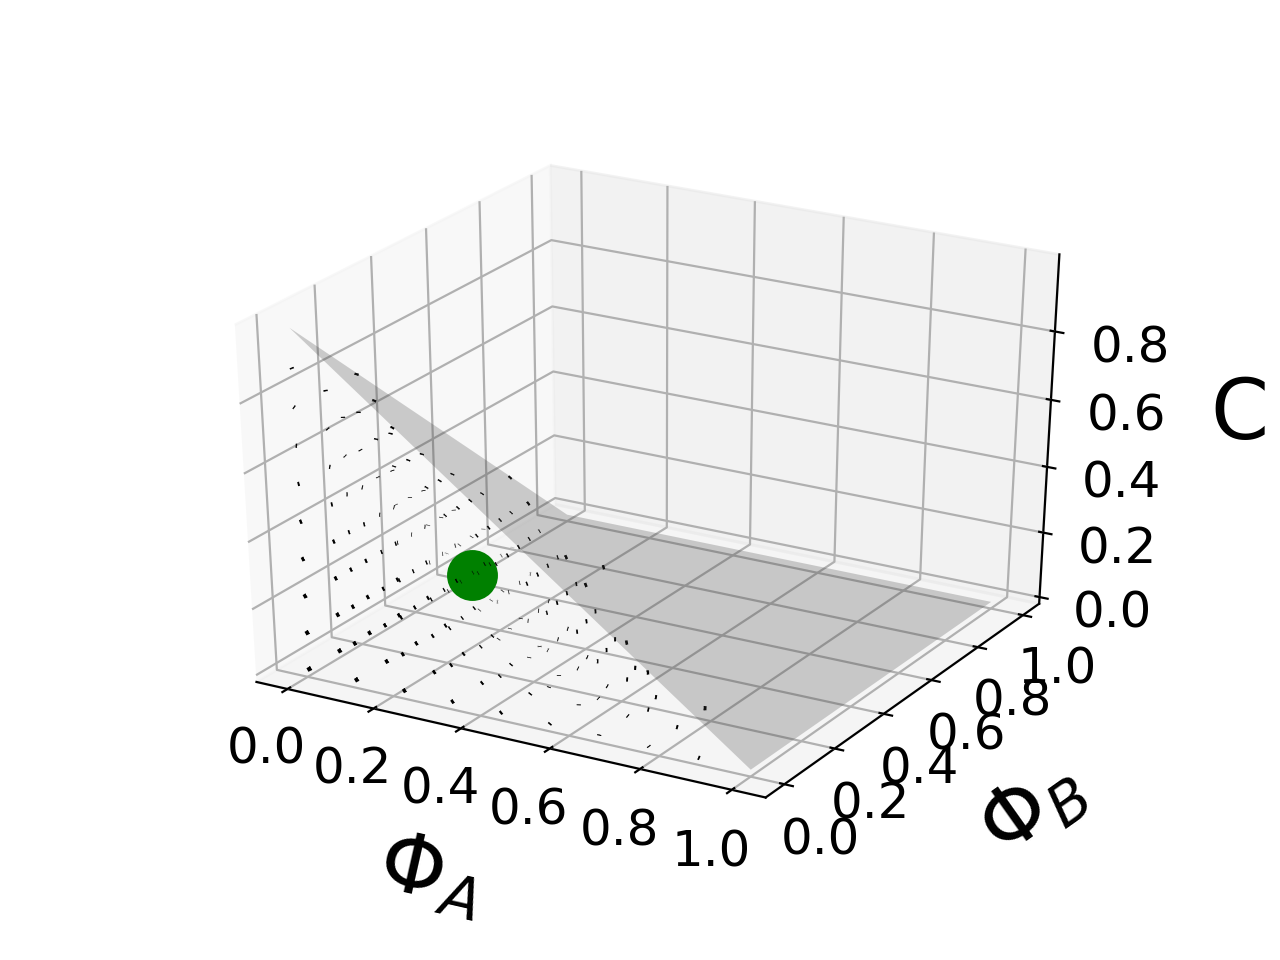

In [66]:
bookmark4 = model8.vector('A', 'B', 'C', params = [('r_{3}', 0.5), ('a_{1}', 0.5), ('r_{1}', 0.5), ('r_{2}', 0.5), ('a_{3}', 0.5), ('g_{2}', 0.5), ('g_{3}', 0.5), ('s', 0.5), ('a_{2}', 0.5), ('g_{1}', 0.5), ('plotLimits', 1), ('systemSize', 1)], bookmark = False)

<IPython.core.display.Javascript object>


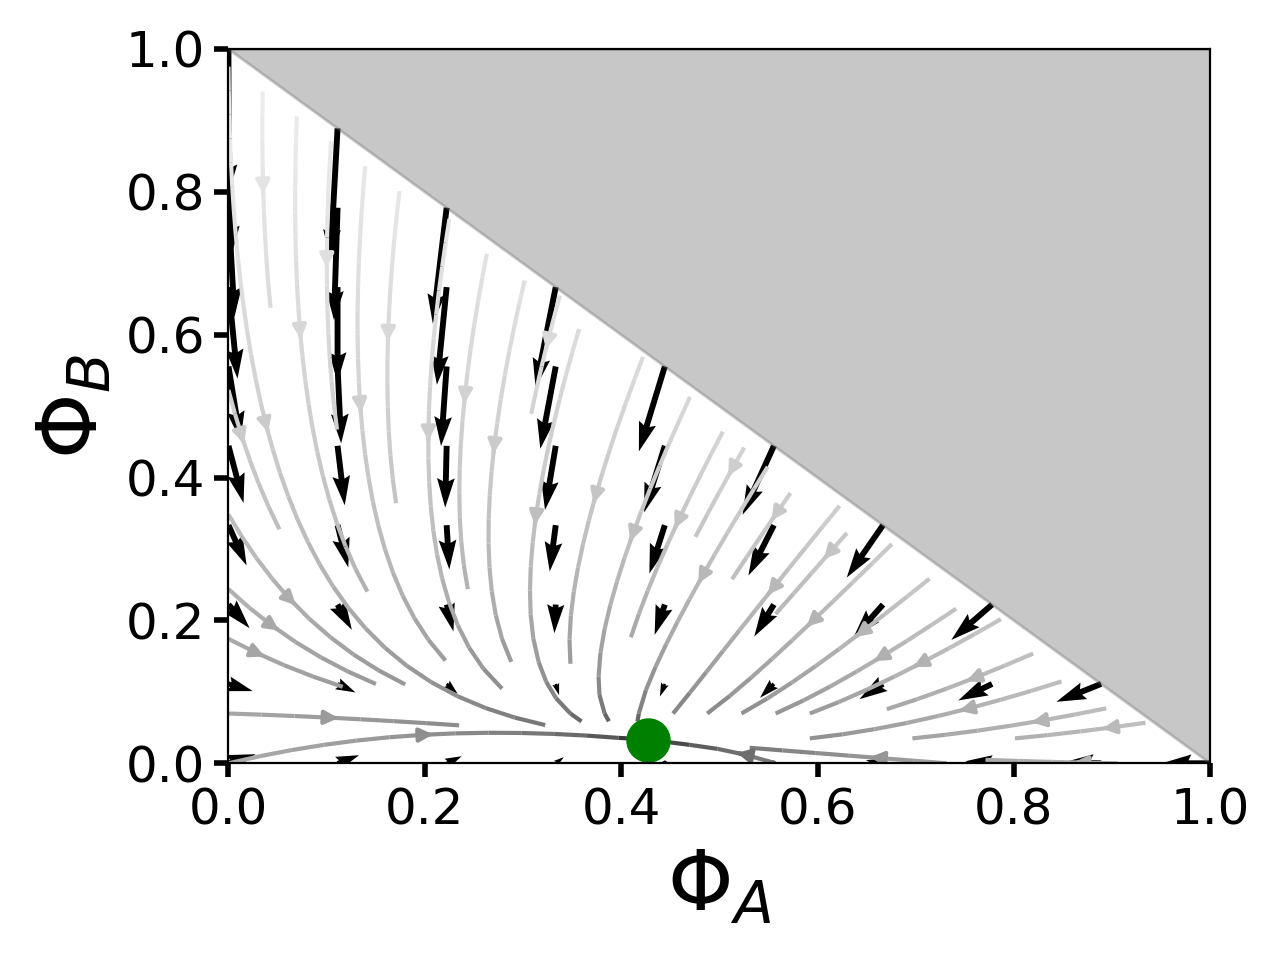

In [67]:
bookmark5 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True, showFixedPoints = False, bookmark = False), model4.vector('A', 'B', silent = True, bookmark = False)], params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], shareAxes = True, bookmark = False)

<IPython.core.display.Javascript object>


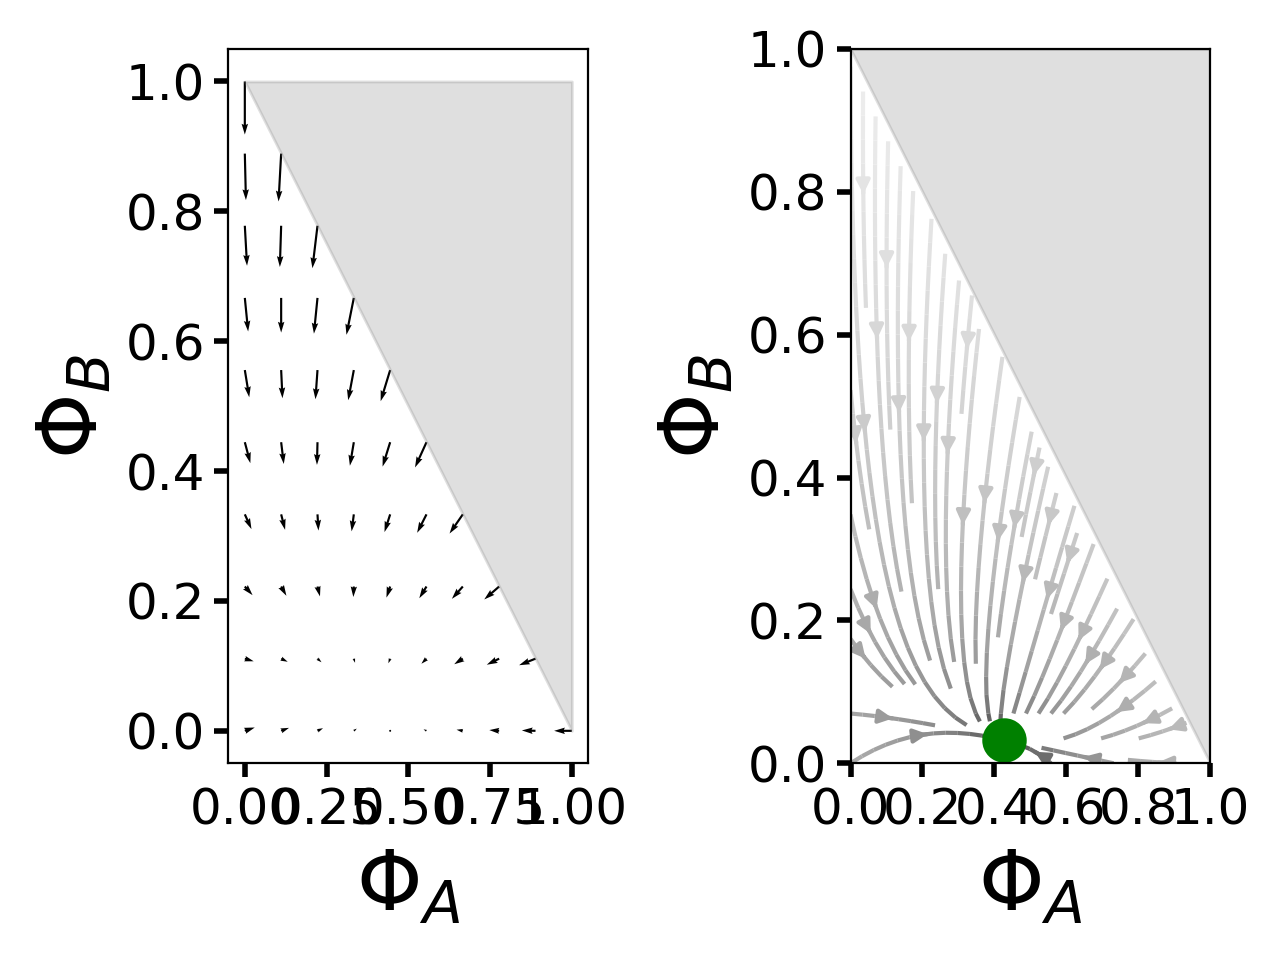

In [68]:
bookmark6 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True, showFixedPoints = False, bookmark = False), model4.stream('A', 'B', silent = True, bookmark = False)], params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], bookmark = False)

In [69]:
#bookmark7 = nested multicontroller bookmark